In [1]:
%matplotlib inline
import tensorflow as tf
from vahun.corpus import Corpus
import numpy as np
from vahun.tools import Timer
from vahun.tools import explog
from vahun.autoencoder import Autoencoder_ffnn
from vahun.genetic import evolution
from vahun.genetic import experiment
from vahun.tools import show_performance

encode=180
dictsize=2000000
popsize=1


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#config.gpu_options.per_process_gpu_memory_fraction=1
corp_path='/mnt/permanent/Language/Hungarian/Corp/Webkorpusz/webkorpusz.wpl'
corp=Corpus(corpus_path=corp_path,
            needed_corpus=["hun_lower_unique"],
            language="Hun",size=dictsize,encoding_len=10)
#database=corp.hun_lower_unique
database=corp.mark_list(corp.hun_lower_unique)
all_features=corp.featurize_data_charlevel_onehot(database)
train=all_features[0:int(len(all_features)*0.8)]
test=all_features[int(len(all_features)*0.8):len(all_features)]
x_train = train.reshape((len(train), np.prod(train.shape[1:])))
x_test = test.reshape((len(test), np.prod(test.shape[1:])))
print(x_train.shape)

logger=explog(encoder_type="Demo_"+str(encode),
              encoding_dim=encode,feature_len=10,
              lang="Hun",unique_words=len(set(database)),
              name="auto_demo_uni"+str(encode),population_size=popsize,
              words=len(corp.hun_lower_unique))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

exp=experiment(encoded_width=10,layermax=10,layermin=2,maxw=10,minw=3,out_dim=380)
#exp.weights=[348, 254, 10, 254, 348, 360]
exp.weights=[encode, 380]
exp.len=len(exp.weights)

Reading file, speed:  2265034.0594525645  words/s
Reading file, speed:  2184129.496889898  words/s
Corpus initalized, fields: ['hun_lower_unique'] 
Unique words:  214708
(46627, 380)


In [2]:
encoder=Autoencoder_ffnn(experiment=exp,
                 logger=logger,tf_session=sess,
                 inputdim=380,
                 layerlist=exp.weights,
                 encode_index=int(exp.len/2),
                 optimizer =tf.train.AdamOptimizer(learning_rate = 0.001),
                 nonlinear=tf.sigmoid)

In [3]:
encoder.train(x_train,x_test,512,80)

^újitanak$ 	 ^éditanak$
^vértelen$ 	 ^vértelen$
  ^végébe$ 	   ^végébe$
   ^marék$ 	    ^marék$
^hajóútra$ 	 ^hajóútra$
 ^nótának$ 	  ^nytának$
 ^köponti$ 	  ^köponti$
 ^fórumra$ 	  ^fórumra$
^egységes$ 	 ^egységes$
 ^védelem$ 	  ^védelem$
 ^avattak$ 	  ^avattak$
 ^pozsgay$ 	  ^pozsgay$
 ^vennénk$ 	  ^vennénk$
^gyanússá$ 	 ^nyaníssé$
  ^fejben$ 	   ^fejben$
^adalékok$ 	 ^adalékok$
  ^jászka$ 	   ^jászka$
^metódust$ 	 ^metódust$
^ambíciói$ 	 ^ambíciói$
^tengődni$ 	 ^tengődni$
  ^takony$ 	   ^takony$
 ^dizájnt$ 	  ^dizájnt$
^csőrével$ 	 ^csőrével$
   ^kémli$ 	    ^kémli$
^virágunk$ 	 ^virágunk$
^pázmándi$ 	 ^pázmándi$
  ^hívjon$ 	   ^hívjon$
^antalhoz$ 	 ^antalhoz$
   ^tonna$ 	    ^tonna$
  ^védője$ 	   ^védője$
   ^fotót$ 	    ^fotót$
 ^veszíti$ 	  ^veszíti$
^siratlak$ 	 ^siratlak$
 ^pisilés$ 	  ^pisilés$
  ^takács$ 	   ^takács$
^epidurál$ 	 ^epidurál$
   ^kitti$ 	    ^kitti$
   ^okádó$ 	    ^okádó$
  ^cingár$ 	   ^cingár$
  ^vojnik$ 	   ^vojnik$
^golgotán$ 	 ^golgotán$
 ^éreznék$ 	  ^é

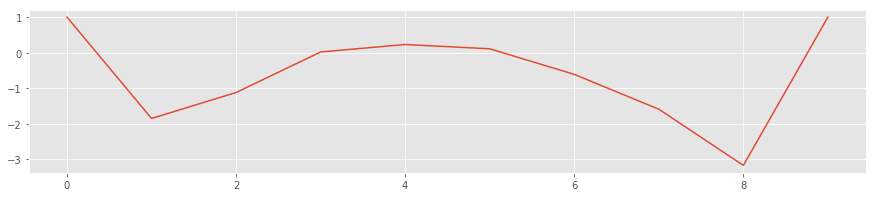

In [4]:
stds=show_performance(encoder,x_test,corp,100,printer=True)

        eh 	       ^ue$
    kecske 	     kecsk$
     kutya 	      kuty$
     aytuk 	      aytó$
    macska 	     macsk$
 árvíztűrő 	  ^rvíztőr$
      fúró 	       ^ár$
     kacsa 	      kacs$
         a 	       ^vk$
        és 	       ^vé$

Accuracy on data:  78.0 %


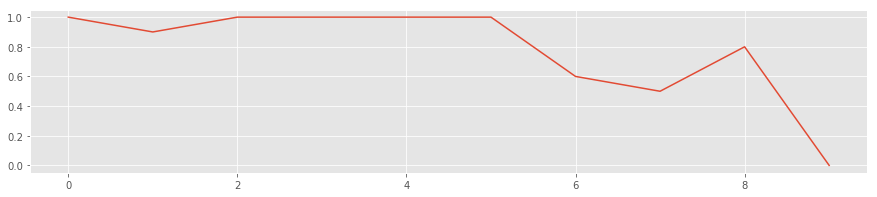

In [8]:
std=show_performance(encoder,["eh","kecske","kutya","aytuk","macska","árvíztűrő","fúró","kacsa","a","és"],corp,printer=True)

In [6]:
def decode_critical(lista,enc=180):
    for POS in lista:
        encoded=np.ones(enc)*-10
        encoded[POS]=10
        a=encoder.decode([encoded])[0].reshape([10,36])
        b=corp.defeaturize_data_charlevel_onehot([a])
        print(b)

In [7]:
import heapq
topstd=heapq.nlargest(6, range(len(stds)), stds.__getitem__)
big_stuff=[]
for i in range(50):
    big_stuff.append([])
    for topind in topstd:
        a=encoder.encode([x_test[i]])
        a[0][topind]=2
        b=encoder.decode([a[0]])[0].reshape([10,36])
        c=corp.defeaturize_data_charlevel_onehot([b])
        big_stuff[i].append(c)
for row in big_stuff:
    print(row)

ValueError: cannot reshape array of size 380 into shape (10,36)